# Regression Neural Network with Tensorflow

We usually have pass through these steps:
1. create the model: set input, hidden layers, output, activation function.
2. Compile the model: specify the loss function, optimizer, and metrics
3. Fit the model
4. Evaluate the model

In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


## 0. Creating the data to model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# features
X =  np.array([3.,4.,-2.,-3.,8.5,9,10.,11.,15.,13.2])

# target
y = np.array([50.,62.,12.,9.,85.3,86.,98.3,100.,221.,200.])

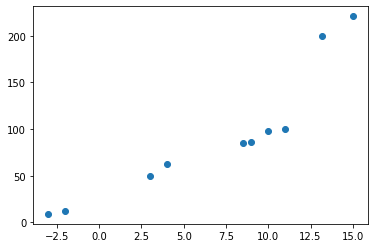

In [ ]:
plt.scatter(X, y)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

## 1. Creating a Simple model

In [ ]:
tf.random.set_seed(42)

# 1. creating the model (sequential)
model = tf.keras.Sequential([ 
        tf.keras.layers.Dense(1)
])

# 2. compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )
# 3. fitting the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 268ms/step - loss: 88.4437 - mae: 88.4437
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 87.9617 - mae: 87.9617
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 87.4798 - mae: 87.4798
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 86.9978 - mae: 86.9978
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 86.5158 - mae: 86.5158


In [ ]:
# predicting
model.predict([5])

array([[6.385299]], dtype=float32)

## 2. Improving the Simple Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mae',
            optimizer=tf.keras.optimizers.Adam(lr=0.01),
            metrics= ['mae'])

model.fit(X, y, epochs =100)

Epoch 1/100
1/1 [==============================] - 0s 438ms/step - loss: 92.8823 - mae: 92.8823
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 90.2654 - mae: 90.2654
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 87.6941 - mae: 87.6941
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 83.8293 - mae: 83.8293
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 78.1705 - mae: 78.1705
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 69.9207 - mae: 69.9207
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 58.6984 - mae: 58.6984
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 44.0053 - mae: 44.0053
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 24.6744 - mae: 24.6744
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 21.4670 - mae: 21.4670
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
# predicting
model.predict([5])

array([[62.908722]], dtype=float32)

## 3. Working on a more complex dataset

In [5]:
import pandas as pd

In [6]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3.1. Processing

In [7]:
df = pd.get_dummies(df)

In [8]:
X = df.drop('charges', axis = 1)
y = df.loc[:, 'charges']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, test_size = .2)

## 4. Modeling

### 4.1. Standard model with basic parameters and without scaling, tensors

In [ ]:
tf.random.set_seed(42)

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fitting
model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10054.9047 - mae: 10054.9047
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7683.8421 - mae: 7683.8421
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7017.7611 - mae: 7017.7611
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8023.8335 - mae: 8023.8335
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7647.7945 - mae: 7647.7945
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7635.1133 - mae: 7635.1133
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7626.4663 - mae: 7626.4663
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7833.3616 - mae: 7833.3616
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7752.4325 - mae: 7752.4325
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 8292.7924 - mae: 8292.79

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8443.0381 - mae: 8443.0381


[8443.0380859375, 8443.0380859375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### 4.2. Changing the optmizer

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

# fitting
model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12037.2324 - mae: 12037.2324
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7460.2837 - mae: 7460.2837
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6904.5968 - mae: 6904.5968
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7307.9240 - mae: 7307.9240
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6944.0307 - mae: 6944.0307
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6645.9543 - mae: 6645.9543
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6362.9806 - mae: 6362.9806
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6429.0944 - mae: 6429.0944
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6258.9775 - mae: 6258.9775
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 6149.1316 - mae: 6149.13

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.8411 - mae: 3167.8411


[3167.841064453125, 3167.841064453125]

### 4.3. Setting activation `relu`

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

# fitting
model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12646.4727 - mae: 12646.4727
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7464.8957 - mae: 7464.8957
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6955.3122 - mae: 6955.3122
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7450.2709 - mae: 7450.2709
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7161.5048 - mae: 7161.5048
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6928.1164 - mae: 6928.1164
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 6563.3361 - mae: 6563.3361
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6596.6199 - mae: 6596.6199
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 6490.5883 - mae: 6490.5883
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 6443.4167 - mae: 6443.41

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2489.0586 - mae: 2489.0586


[2489.05859375, 2489.05859375]

### 4.4. Adding another hidden layer

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

# fitting
model.fit(X_train, y_train, epochs =100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 11051.7499 - mae: 11051.7499
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7046.5539 - mae: 7046.5539
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6333.2845 - mae: 6333.2845
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 6499.3655 - mae: 6499.3655
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 5790.3930 - mae: 5790.3930
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 4754.9011 - mae: 4754.9011
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3600.6041 - mae: 3600.6041
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3714.1451 - mae: 3714.1451
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3451.0260 - mae: 3451.0260
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3241.4717 - mae: 3241.47

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1958.0482 - mae: 1958.0482


[1958.0482177734375, 1958.0482177734375]

### 4.5. Trying a different combination of hidden layers

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics=['mae'])

# fitting
model.fit(X_train, y_train, epochs =100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10787.0619 - mae: 10787.0619
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7022.5594 - mae: 7022.5594
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6026.0796 - mae: 6026.0796
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 6188.7436 - mae: 6188.7436
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 4695.2856 - mae: 4695.2856
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 3637.6749 - mae: 3637.6749
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3434.4365 - mae: 3434.4365
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3553.0578 - mae: 3553.0578
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3275.7411 - mae: 3275.7411
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3183.1214 - mae: 3183.12

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1919.8046 - mae: 1919.8046


[1919.8045654296875, 1919.8045654296875]

| config | train | test |
| --- | --- | --- |
| standard | 6972.4658 | 8443.0381 |
| + lr=0.1 | 3253.8073 | 3167.8411 |
| + relu | 2460.6630 | 2489.0586 |
| + hidden | 2062.9043 | 1958.0482 |
| hidden 32 and 16 | 1827.0490 | 1919.8046 | 

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics=['mae'])

# fitting
history = model.fit(X_train, y_train, epochs =100)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12654.4843 - mae: 12654.4843
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7454.3383 - mae: 7454.3383
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6882.1693 - mae: 6882.1693
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7326.1504 - mae: 7326.1504
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6929.1349 - mae: 6929.1349
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6570.5460 - mae: 6570.5460
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6246.8985 - mae: 6246.8985
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6375.3467 - mae: 6375.3467
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6103.6621 - mae: 6103.6621
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5853.5532 - mae: 5853.55

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1814.8732 - mae: 1814.8732


[1814.8731689453125, 1814.8731689453125]

Text(0.5, 0, 'epochs')

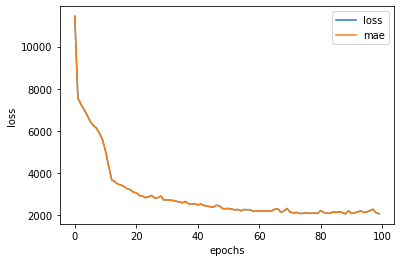

In [ ]:
# plot history: a loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### 4.6. Testing 1000 epochs

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics=['mae'])

# fitting
history = model.fit(X_train, y_train, epochs =1000)


Epoch 1/1000
34/34 [==============================] - 0s 2ms/step - loss: 12325.2578 - mae: 12325.2578
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 7514.3544 - mae: 7514.3544
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 6833.7813 - mae: 6833.7813
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 7251.0216 - mae: 7251.0216
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 6825.7991 - mae: 6825.7991
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 6479.5026 - mae: 6479.5026
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 6196.3289 - mae: 6196.3289
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 6258.0443 - mae: 6258.0443
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 5875.3043 - mae: 5875.3043
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 5494.8484 - ma

In [ ]:
#  evaluating the model
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1342.0986 - mae: 1342.0986


[1342.0986328125, 1342.0986328125]

Text(0.5, 0, 'epochs')

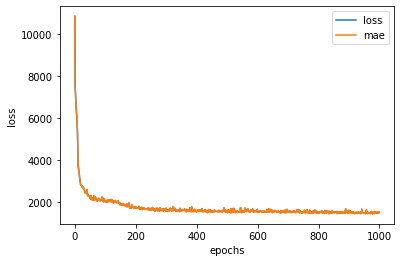

In [ ]:
# plot history: a loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
model.save('the_best_1000.h5')

## 5. Preprocessing data in order to improve the accuracy

Neural Networks tend to prefer normalziation

In [4]:
model = tf.keras.models.load_model('insurance_1342_test.h5')

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [18]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# create X and Y
X = df.drop('charges', axis =1)
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, test_size = .2)

# fitting the column transf to data
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

## 6. Modeling Again with preprocessed data

In [26]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics=['mae'])

# fitting
history = model.fit(X_train_normal, y_train, epochs =100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13722.5667 - mae: 13722.5667
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 10021.0824 - mae: 10021.0824
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7474.4086 - mae: 7474.4086
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 6251.6365 - mae: 6251.6365
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 4223.9362 - mae: 4223.9362
Epoch 6/100
34/34 [==============================] - 0s 954us/step - loss: 3753.2217 - mae: 3753.2217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 3276.6081 - mae: 3276.6081
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 3305.8398 - mae: 3305.8398
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 3297.1056 - mae: 3297.1056
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 3204.6283 - mae: 320